# Training Sequence Classifier Head

In [1]:
from adaptnlp import EasyDocumentEmbeddings, SequenceClassifierTrainer


### 1. Initialize corpus, output directory for the model, and document embeddings

In [2]:
corpus = "Path/to/data/directory" 
OUTPUT_DIR = "Path/to/model/output/directory" 
doc_embeddings = EasyDocumentEmbeddings("bert-base-cased", methods = ["rnn"])

May need a couple moments to instantiate...
RNN embeddings loaded


### 2. Initialize Sequence Classification Trainer

In [3]:
sc_configs = {
              "corpus": corpus,
              "encoder": doc_embeddings,
              "column_name_map": {0: "text", 1: "label"},
              "corpus_in_memory": True,
              "predictive_head": "flair",
             }
sc_trainer = SequenceClassifierTrainer(**sc_configs)

2020-02-03 17:24:41,190 Reading data from ../../development/data/trec_6
2020-02-03 17:24:41,191 Train: ../../development/data/trec_6/train.csv
2020-02-03 17:24:41,191 Dev: ../../development/data/trec_6/dev.csv
2020-02-03 17:24:41,192 Test: ../../development/data/trec_6/test.csv
2020-02-03 17:24:42,331 Computing label dictionary. Progress:


100%|██████████| 4907/4907 [00:00<00:00, 221391.61it/s]

2020-02-03 17:24:42,356 [b'LOC', b'DESC', b'ENTY', b'HUM', b'NUM', b'ABBR']


### 3. Find Learning Rate with automated LR finder

[1.5135612484362082e-08]
[1.8620871366628676e-08]
[2.2908676527677733e-08]
[2.818382931264454e-08]
[3.4673685045253164e-08]
[4.265795188015927e-08]
[5.2480746024977265e-08]
[6.456542290346554e-08]
[7.943282347242815e-08]
[9.772372209558107e-08]
[1.2022644346174127e-07]
[1.4791083881682077e-07]
[1.819700858609984e-07]
[2.2387211385683393e-07]
[2.754228703338167e-07]
[3.3884415613920264e-07]
[4.168693834703353e-07]
[5.128613839913649e-07]
[6.309573444801935e-07]
[7.762471166286916e-07]
[9.54992586021436e-07]
[1.1748975549395298e-06]
[1.4454397707459273e-06]
[1.778279410038923e-06]
[2.187761623949553e-06]
[2.6915348039269168e-06]
[3.311311214825913e-06]
[4.0738027780411255e-06]
[5.011872336272722e-06]
[6.165950018614822e-06]
[7.585775750291839e-06]
[9.332543007969913e-06]
[1.1481536214968832e-05]
[1.4125375446227536e-05]
[1.737800828749375e-05]
[2.1379620895022316e-05]
[2.6302679918953824e-05]
[3.2359365692962836e-05]
[3.981071705534974e-05]
[4.8977881936844595e-05]
[6.025595860743576e-05

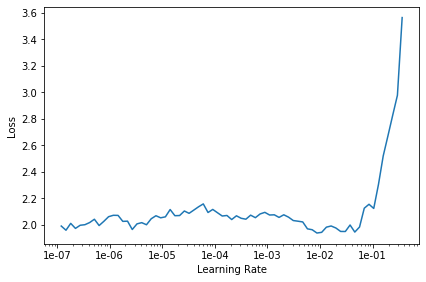

Recommended Learning Rate 0.013182567385564083


In [5]:
sc_lr_configs = {
        "output_dir": OUTPUT_DIR,
        "start_learning_rate": 1e-8,
        "end_learning_rate": 10,
        "iterations": 100,
        "mini_batch_size": 32,
        "stop_early": True,
        "smoothing_factor": 0.8,
        "plot_learning_rate": True,
}
learning_rate = sc_trainer.find_learning_rate(**sc_lr_configs)

### 4. Train Sequence Classifier

In [ ]:
sc_train_configs = {
        "output_dir": OUTPUT_DIR,
        "learning_rate": learning_rate,
        "mini_batch_size": 32,
        "anneal_factor": 0.5,
        "patience": 5,
        "max_epochs": 150,
        "plot_weights": False,
        "batch_growth_annealing": False,
}
sc_trainer.train(**sc_train_configs)

2020-02-03 17:22:48,895 ----------------------------------------------------------------------------------------------------
2020-02-03 17:22:48,898 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): BertEmbeddings(
        (model): BertModel(
          (embeddings): BertEmbeddings(
            (word_embeddings): Embedding(28996, 768, padding_idx=0)
            (position_embeddings): Embedding(512, 768)
            (token_type_embeddings): Embedding(2, 768)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (encoder): BertEncoder(
            (layer): ModuleList(
              (0): BertLayer(
                (attention): BertAttention(
                  (self): BertSelfAttention(
                    (query): Linear(in_features=768, out_features=768, bias=True)
                    (key): Linear(in_featu

### 5. Load and Predict

In [4]:
from adaptnlp import EasySequenceClassifier
# Set example text and instantiate tagger instance
example_text = '''Where was the Queen's wedding held? '''

classifier = EasySequenceClassifier()

sentences = classifier.tag_text(example_text, model_name_or_path="../5. Finetuning and Training (Advanced)/resources/taggers/bert-base-cased-control-trec_6-finetuned/final-model.pt")
print("Label output:\n")
for sentence in sentences:
    print(sentence.labels)

2020-02-03 17:25:22,688 loading file ../5. Finetuning and Training (Advanced)/resources/taggers/bert-base-cased-control-trec_6-finetuned/final-model.pt
Label output:

[LOC (0.9996310472488403)]


# Training Sequence Classifier on Finetuned Model

In [ ]:
corpus = "../../development/data/trec_6"
OUTPUT_DIR = "./resources/taggers/bert-base-cased-control-trec_6-finetuned"
doc_embeddings = EasyDocumentEmbeddings("./resources/finetuned/bert-base-cased-trec_6", methods = ["rnn"])

In [ ]:
sc_configs = {
              "corpus": corpus,
              "encoder": doc_embeddings,
              "column_name_map": {0: "text", 1: "label"},
              "corpus_in_memory": True,
              "predictive_head": "flair",
             }
sc_trainer = SequenceClassifierTrainer(**sc_configs)

In [ ]:
sc_lr_configs = {
        "output_dir": OUTPUT_DIR,
        "start_learning_rate": 1e-8,
        "end_learning_rate": 10,
        "iterations": 100,
        "mini_batch_size": 32,
        "stop_early": True,
        "smoothing_factor": 0.8,
        "plot_learning_rate": True,
}
learning_rate = sc_trainer.find_learning_rate(**sc_lr_configs)

In [ ]:
sc_train_configs = {
        "output_dir": OUTPUT_DIR,
        "learning_rate": learning_rate,
        "mini_batch_size": 32,
        "anneal_factor": 0.5,
        "patience": 5,
        "max_epochs": 150,
        "plot_weights": False,
        "batch_growth_annealing": False,
}
sc_trainer.train(**sc_train_configs)